# Name: Premkumar Vilas Dhanawade

# @The Sparks Foundation

# Data Science & Business Analytics Intern

# Task 3: Exploratory Data Analysis - Retail

Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ as business manager who will try to find out weak areas where he can work to make more profit.

# Dataset: https://bit.ly/3i4rbWl

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [49]:
#loading dataset
df = pd.read_csv('D:/Data Science/Spark Foundation/Task 3/SampleSuperstore.csv')  
 #display top 5 rows
df.head()   

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Preprocessing

In [32]:
df.shape

(9994, 13)

In [33]:
#display summary
df.describe()       

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [34]:
#checking null values
df.isnull().sum()       

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [35]:
#information about dataset
df.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [44]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [45]:
df.duplicated().sum()

0

In [46]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [47]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

# Find the correlation

In [50]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

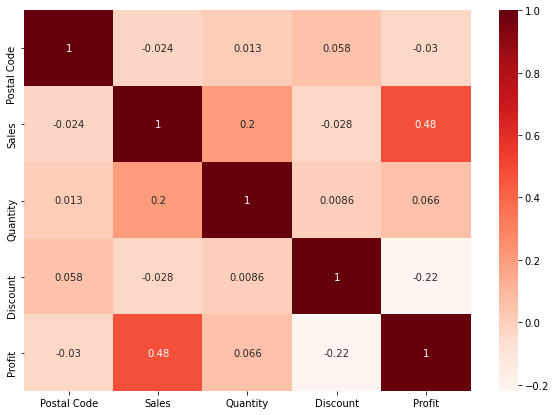

In [51]:
plt.figure(figsize=(10,7))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Reds')

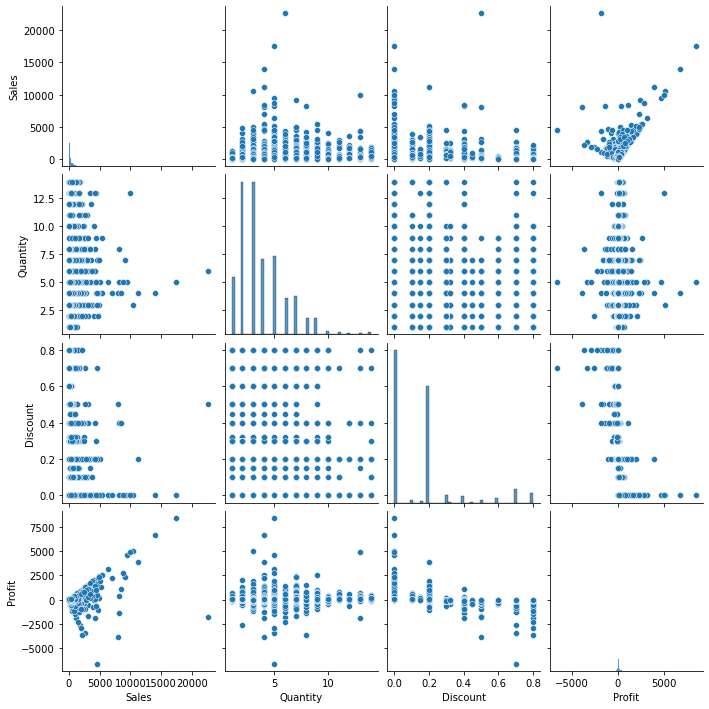

In [14]:
sns.pairplot(data=df)

# Observation :

     - Profit and Postal Code are Negatively Correlated.
     - Profit and Sales are Positively Correlated.
     - Quantity and Profit are less Moderately Correlated.
     - Profit and Discount are Negatively Correlated.

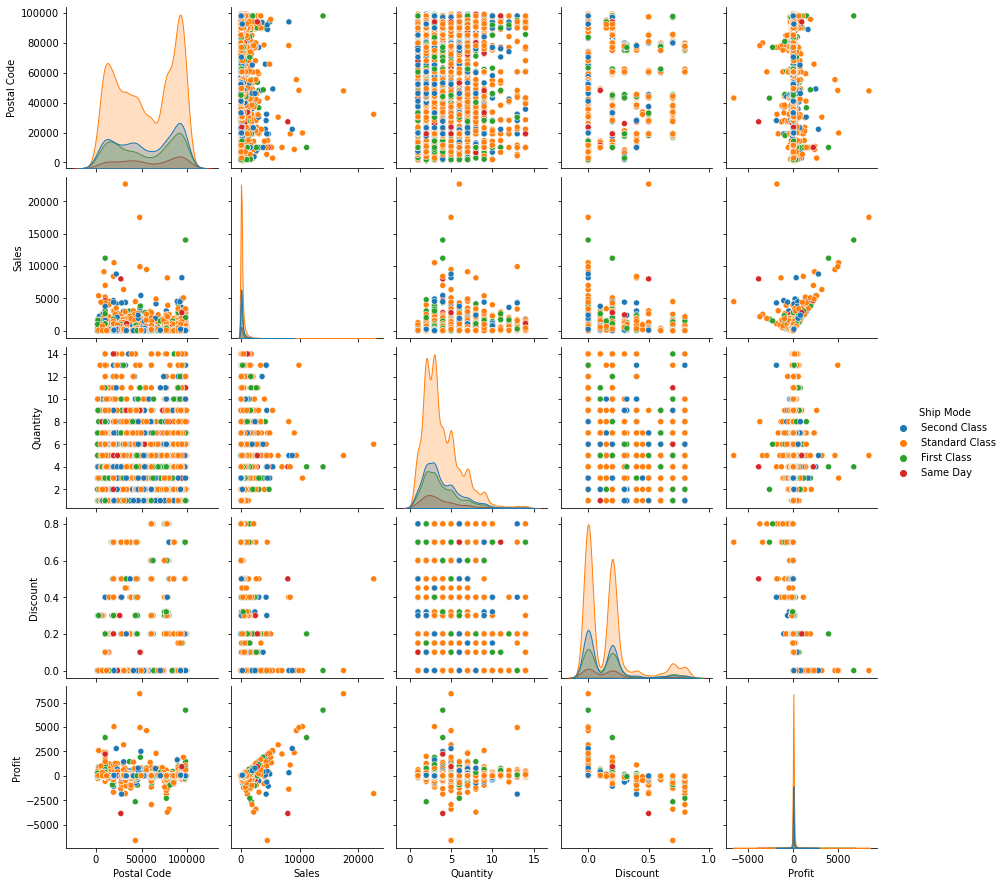

In [52]:
sns.pairplot(df, hue='Ship Mode')
plt.show()

In [53]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

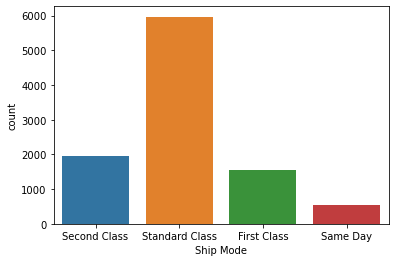

In [54]:
sns.countplot(x=df['Ship Mode'])

In [55]:
 #valuecounts for segment
df['Segment'].value_counts()       

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

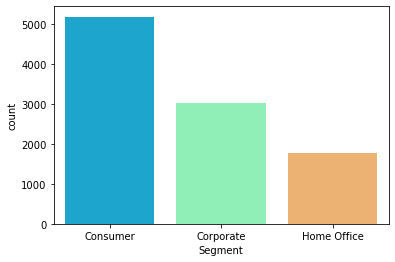

In [56]:
sns.countplot(x=df['Segment'],palette = 'rainbow')

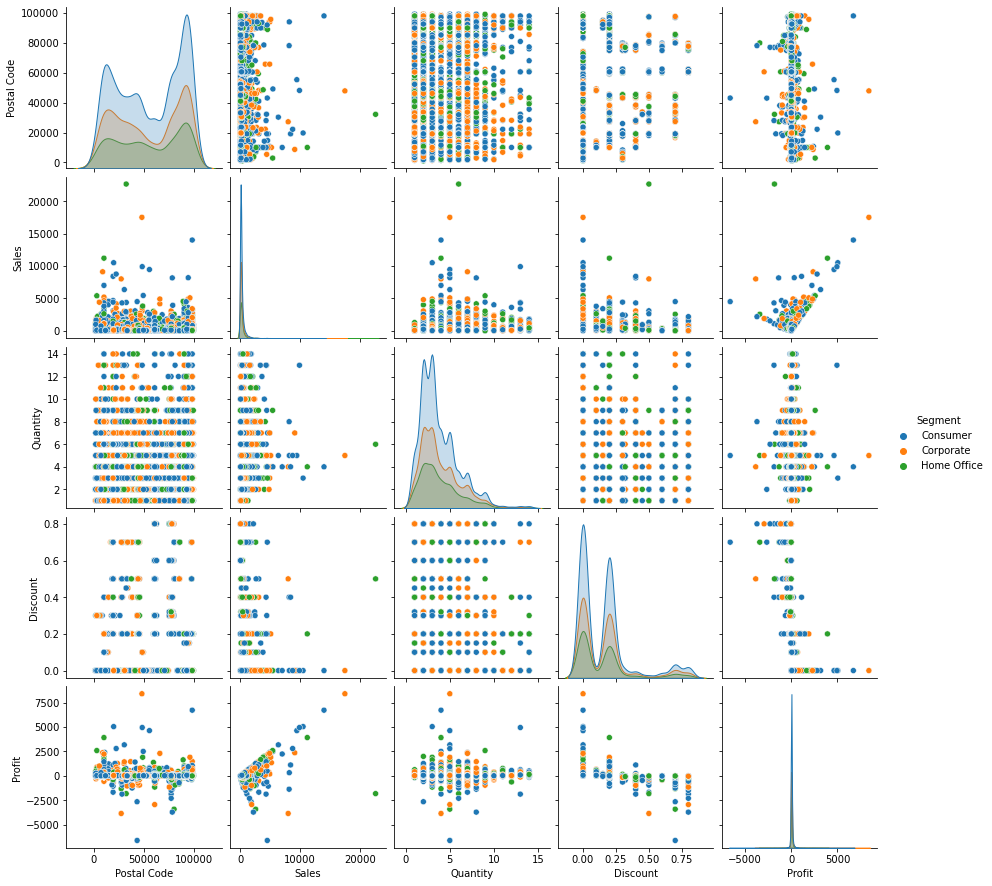

In [57]:
#plotting pair plot
sns.pairplot(df,hue = 'Segment')     

In [58]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

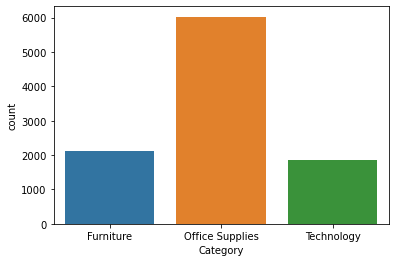

In [59]:
sns.countplot(x='Category',data=df,palette='tab10')

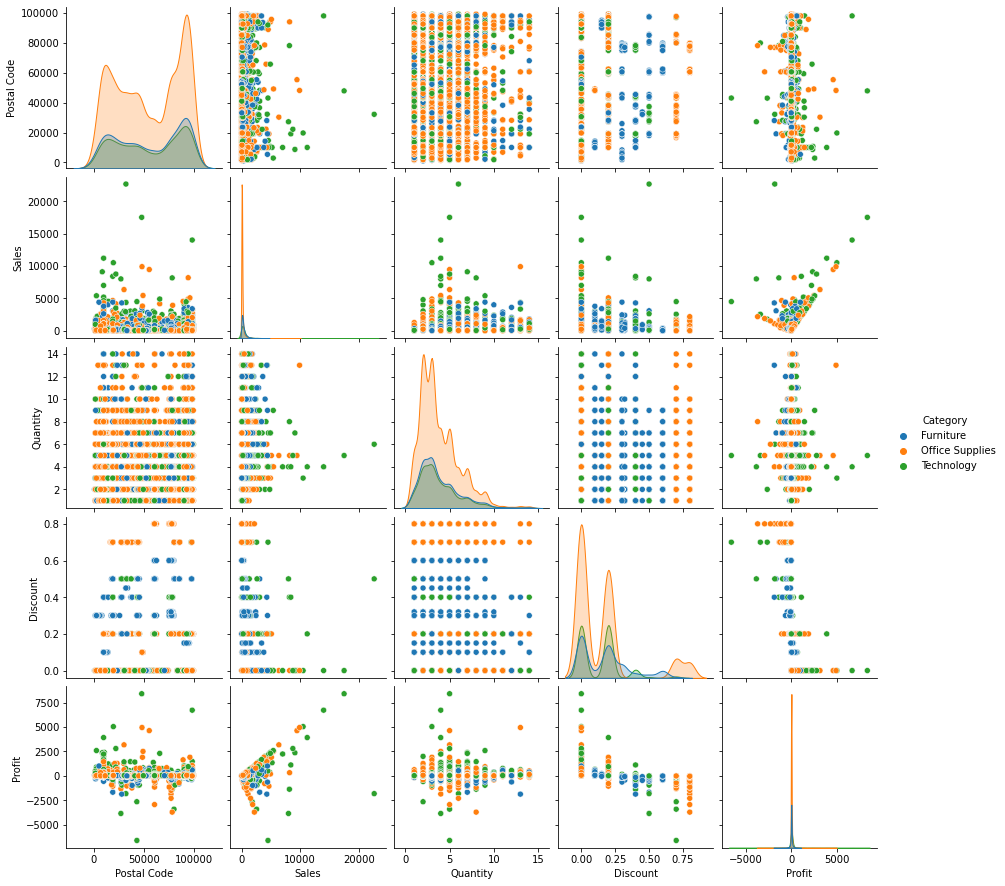

In [60]:
sns.pairplot(df,hue='Category')

In [61]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

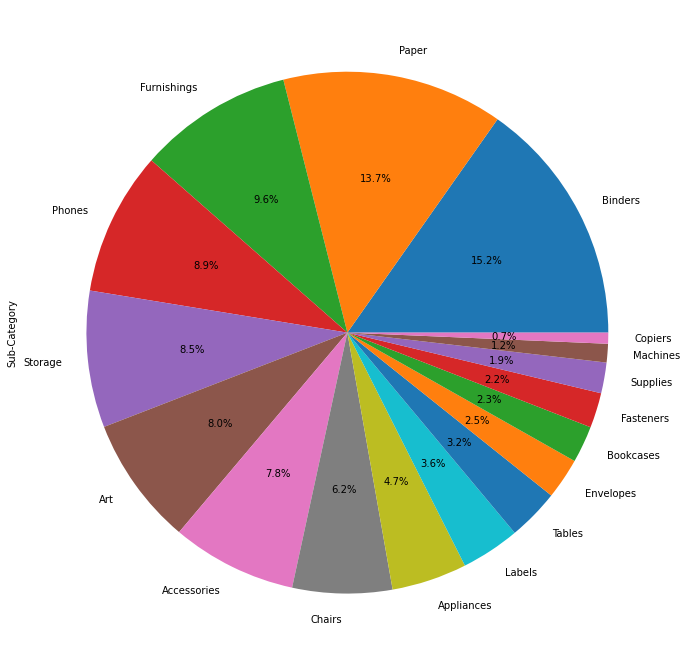

In [62]:
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

# Observation :

    - Find the Sales of each State.

In [70]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


Text(0.5, 1.0, 'State wise analysis of Sale')

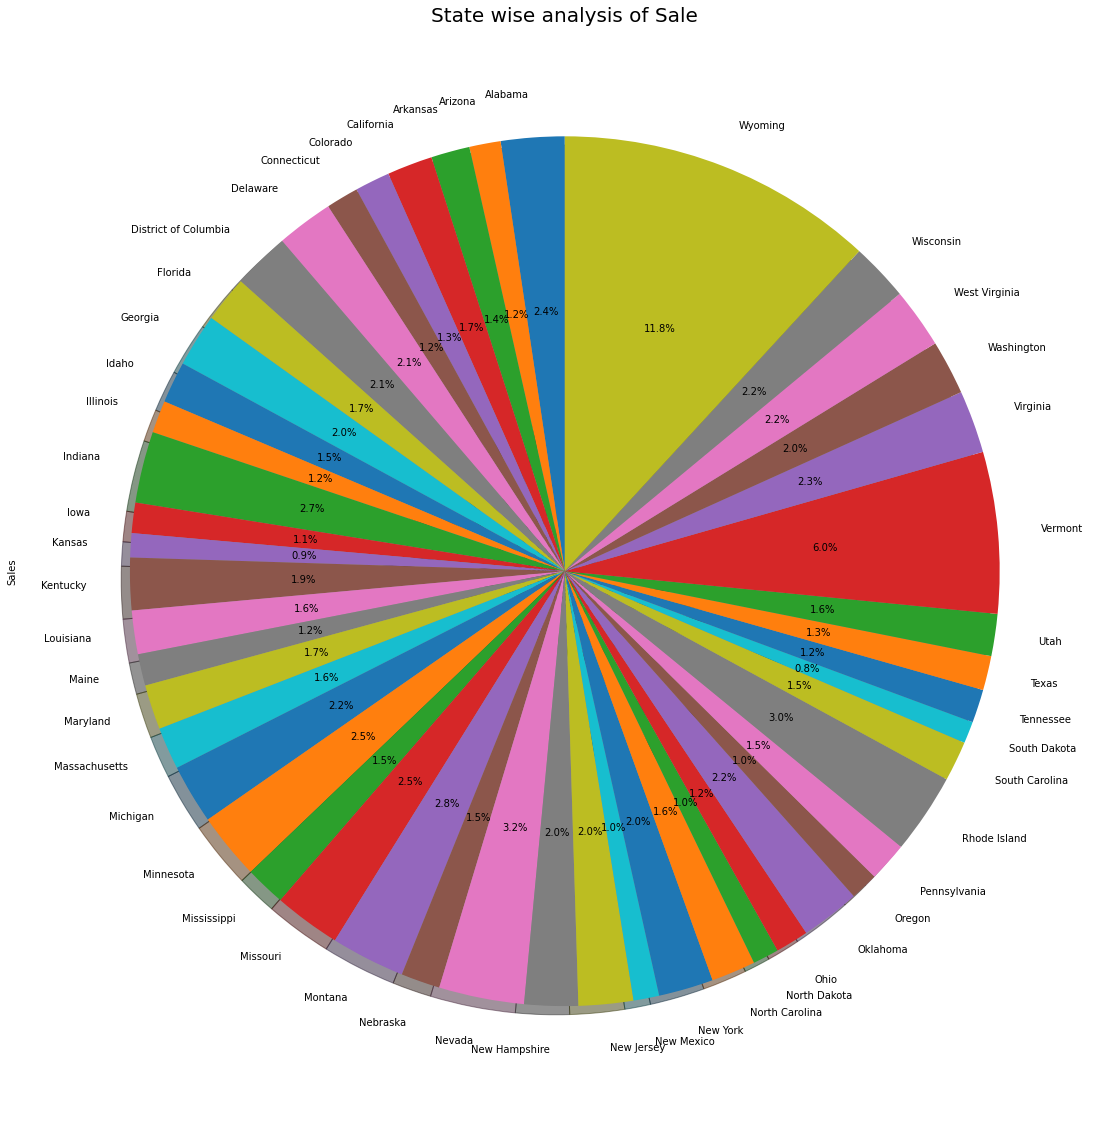

In [71]:
df_state['Sales'].plot(kind='pie',
                        figsize = (20,20),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State wise analysis of Sale',fontsize=20)

# Find out Outlier Using Boxplot

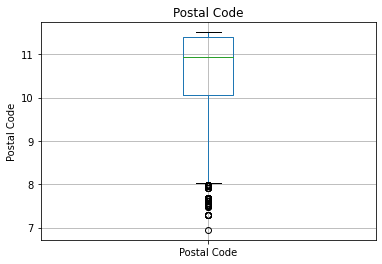

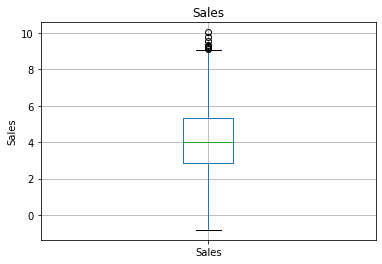

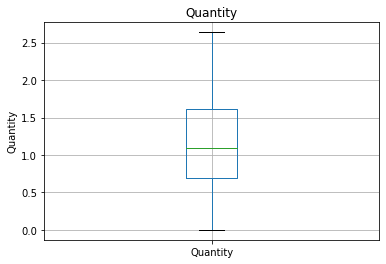

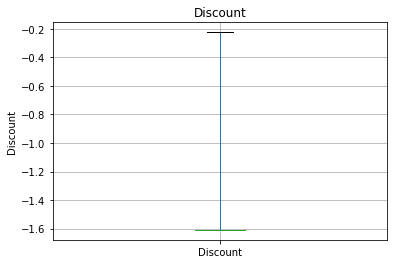

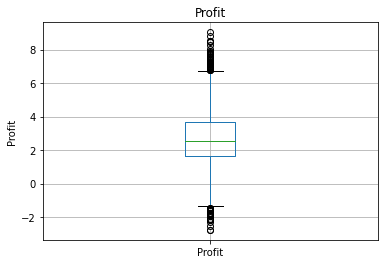

In [63]:
for feature in ['Postal Code', 'Sales', 'Quantity', 'Discount','Profit']:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature,grid = True)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Observation : The Postal Code, Sales, Discount and Profit having outlier Dataset

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

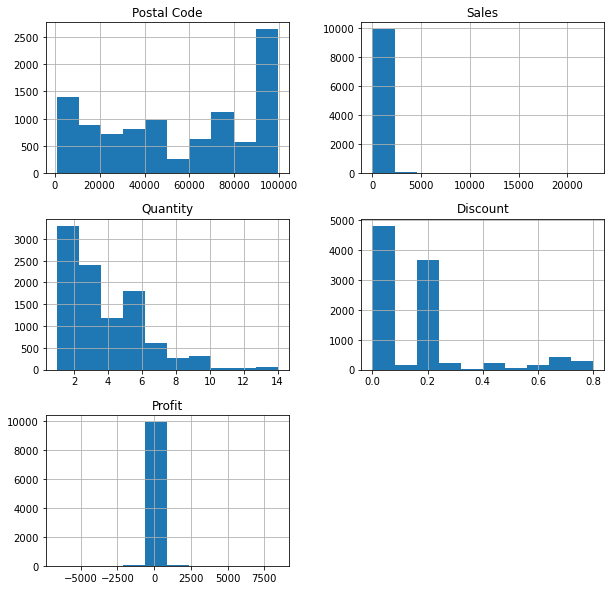

In [64]:
df.hist(bins=10,figsize=(10,10))

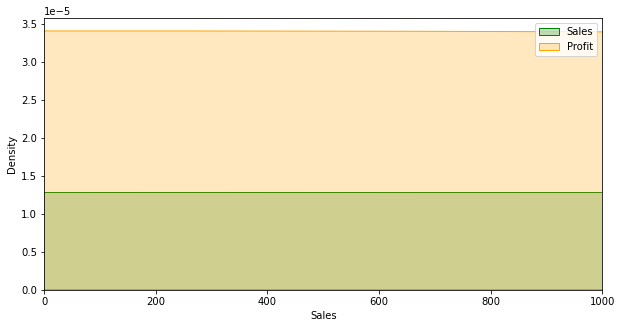

In [65]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Sales'], color='green',label='Sales',shade=True, bw=50)
sns.kdeplot(df['Profit'],color='orange',label='Profit',shade=True,bw=50)
plt.xlim([0, 1000])
plt.legend()

# Observation 

Maximum are from Binders, Paper, furnishings, Phones, storage, art, accessories and minimum from copiers, machines, suppliers

In [31]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

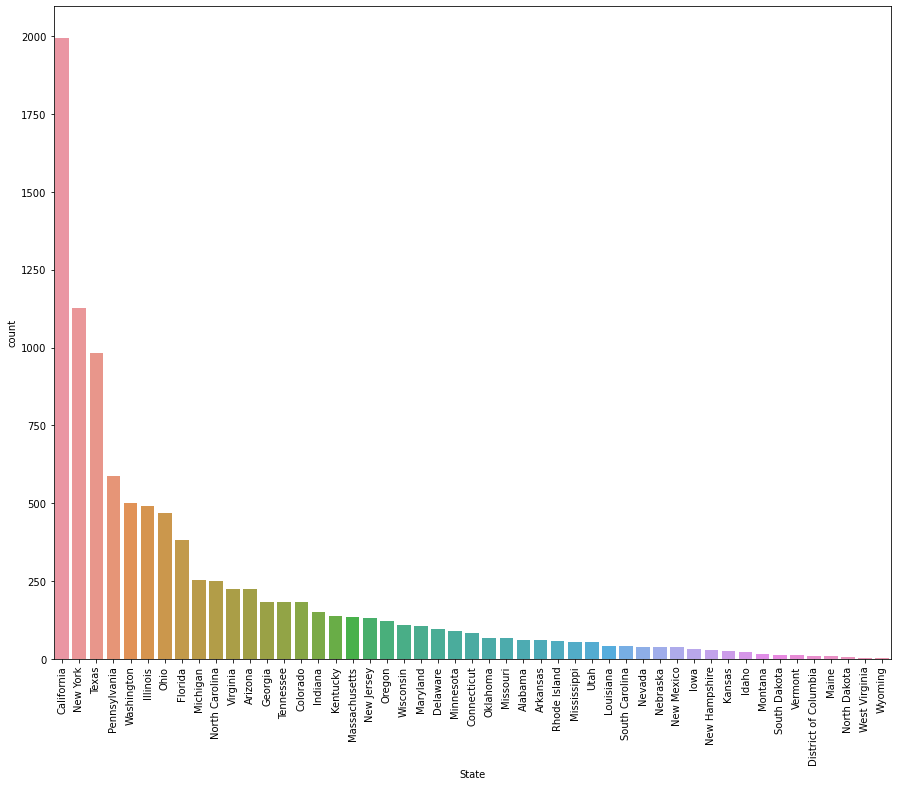

In [32]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Observation 

Highest number of buyers are from California and New York

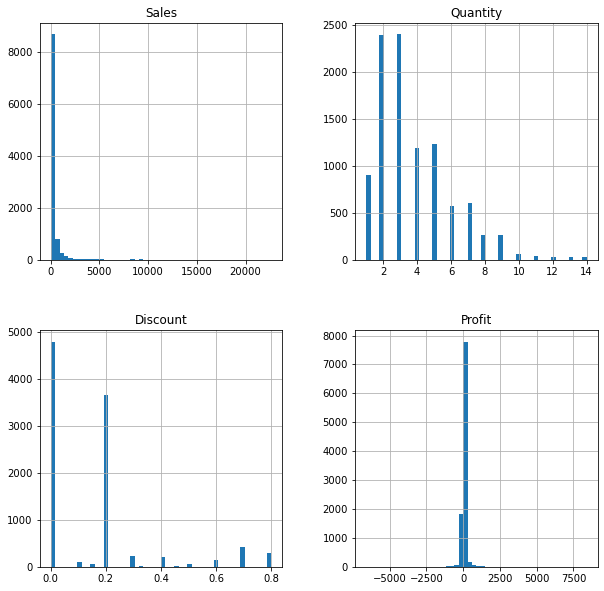

In [33]:
df.hist(figsize=(10,10),bins=50)
plt.show()

# Observation 

Most customers tends to buy quantity of 2 and 3
Discount give maximum is 0 to 20 percent

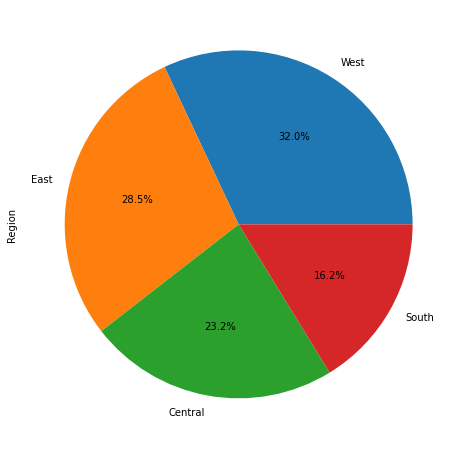

In [35]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

# Profit vs Discount

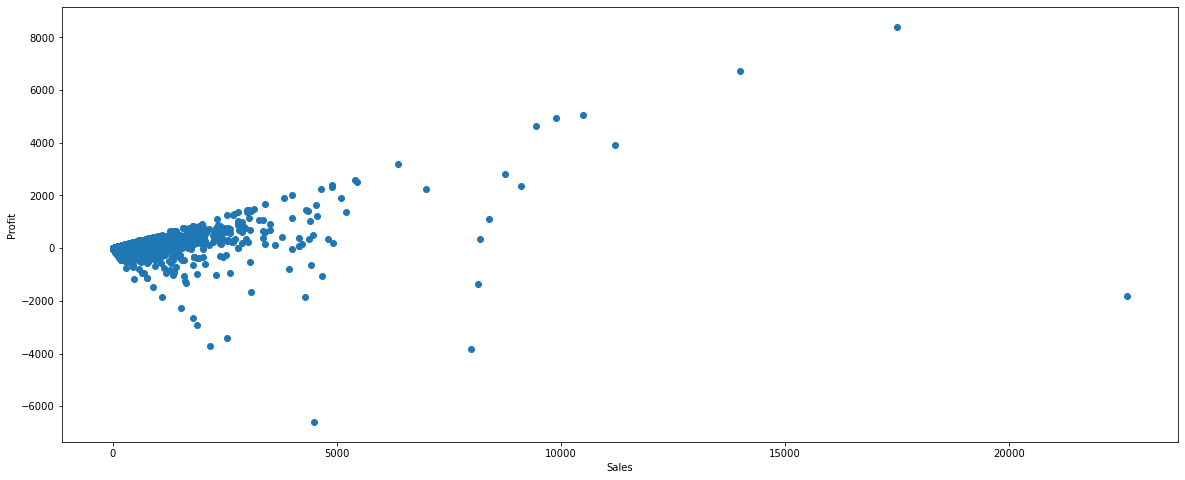

In [36]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

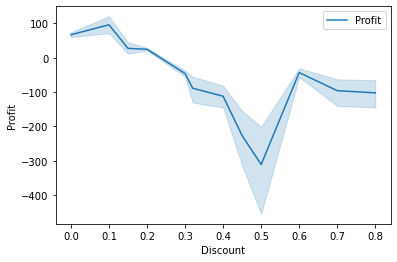

In [37]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

# Observation 

No correlation between profit and discount

# Profit vs Quantity

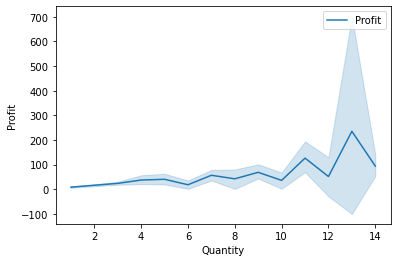

In [38]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

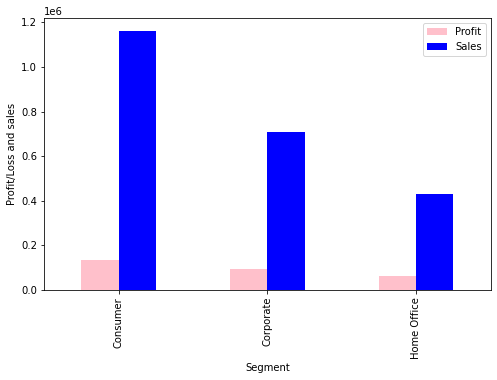

In [39]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

# Observation 

Profit and sales are maximum in consumer segment and minimum in Home Office segment

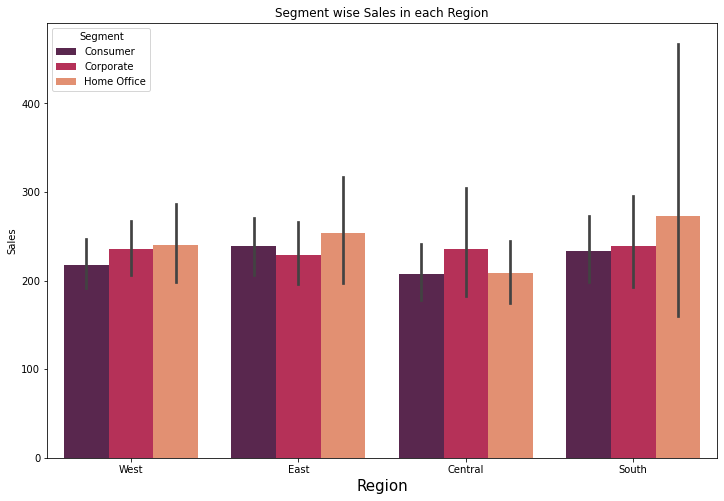

In [40]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

# Observation 

Segment wise sales are almost same in every region

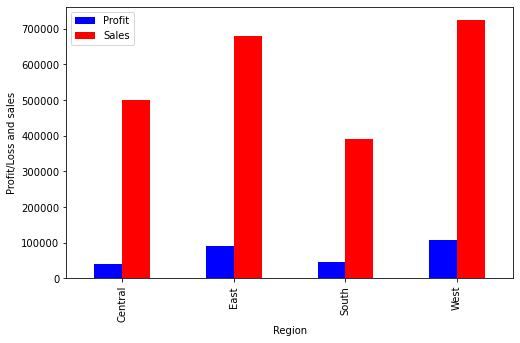

In [41]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

# Observation 

Profit and sales are maximum in west region and minimum in south region

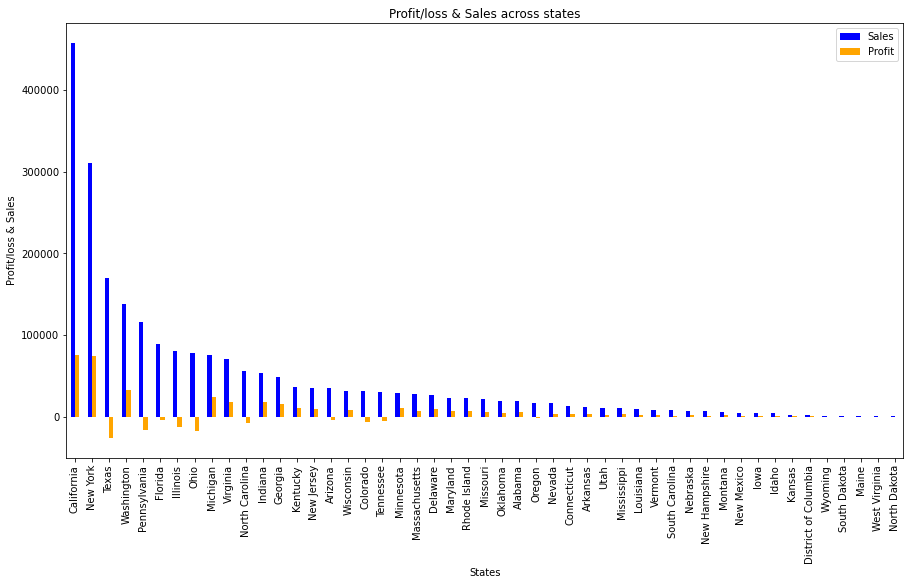

In [42]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

# Observation 

high profit is for california, new york
loss is for texas, pennsylvania, Ohio

In [43]:
t_states = df['State'].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

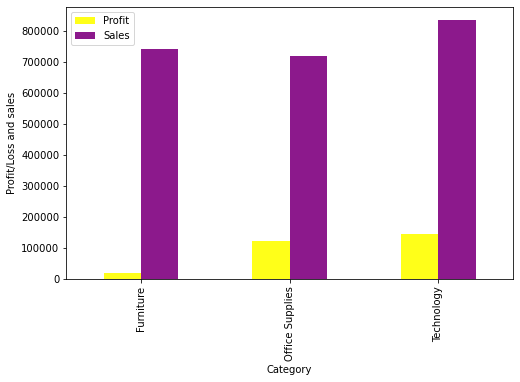

In [44]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

# Observation 

# As a business manager, try to find out the weak areas where you can work to make more profit?

Technology and Office Supplies have high profit.
Furniture have less profit

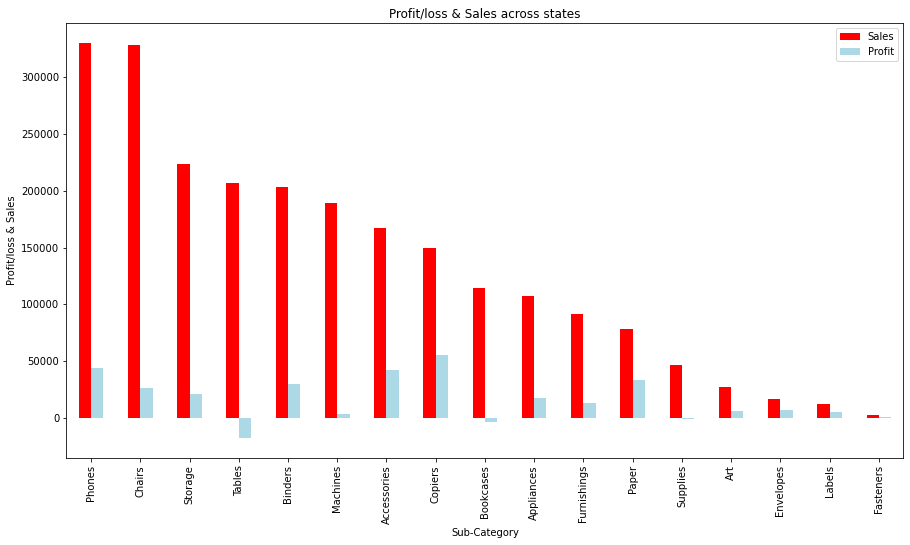

In [46]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

# Observation 

#Phones sub-category have high sales.
chairs have high sales but less profit compared to phones
Tables and Bookmarks sub-categories facing huge loss

# CONCLUTION :- 
    - Profit is more than that of sale but there are some areas where profit could be increased.

# Thank You